# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [4]:
import pandas as pd


df = pd.read_csv('bank-additional-full.csv', sep=';')


df.info()


print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [45]:

categorical_columns = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome', 'y'
]


df[categorical_columns] = df[categorical_columns].astype('category')


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id


The objective of this task is to predict whether a client will subscribe to a term deposit (y) based on their demographic, financial, and campaign-related information. By building a predictive model, the bank can focus its marketing efforts on clients who are most likely to respond positively. This will help improve the efficiency of telemarketing campaigns, save resources, and increase the overall success rate of term deposit subscriptions. The task also aims to identify the key factors that influence a client’s decision to subscribe.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd


features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
target = 'y'


one_hot_encoder = OneHotEncoder(sparse=False, drop='first') 
encoded_features = one_hot_encoder.fit_transform(df[features])

encoded_feature_names = one_hot_encoder.get_feature_names_out(features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)


label_encoder = LabelEncoder()
encoded_df['y'] = label_encoder.fit_transform(df[target])


encoded_df.head()


C:\Users\ikesc\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [52]:
from sklearn.model_selection import train_test_split


X = encoded_df.drop(columns=['y'])  
y = encoded_df['y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training Features: {X_train.shape}, Training Target: {y_train.shape}")
print(f"Testing Features: {X_test.shape}, Testing Target: {y_test.shape}")


Training Features: (32950, 104), Training Target: (32950,)
Testing Features: (8238, 104), Testing Target: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [54]:

majority_class = df['y'].value_counts().idxmax()  
baseline_accuracy = df['y'].value_counts(normalize=True).max()  


print(f"Majority Class: {majority_class}")
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")



Majority Class: no
Baseline Accuracy: 0.89


Baseline accuracy is 89% because  89% of the data said no. IF a model were to predict no for every instance, it would achieve 89% accuracy. We should aim to beat that.

Majority Class: no
Baseline Accuracy: 0.89


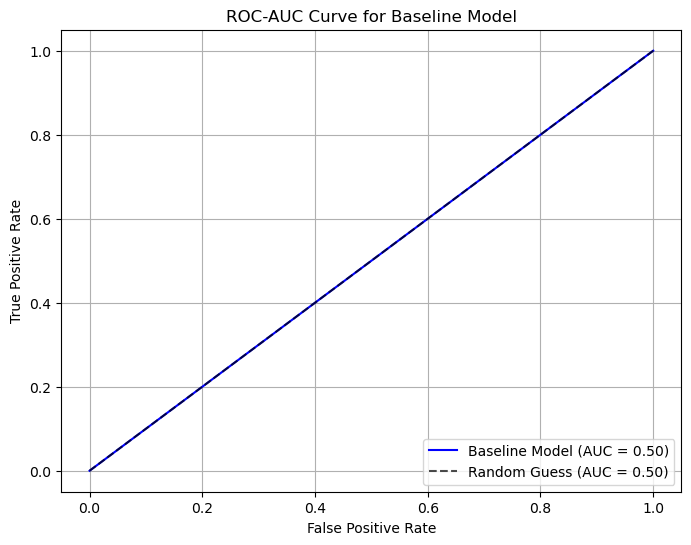

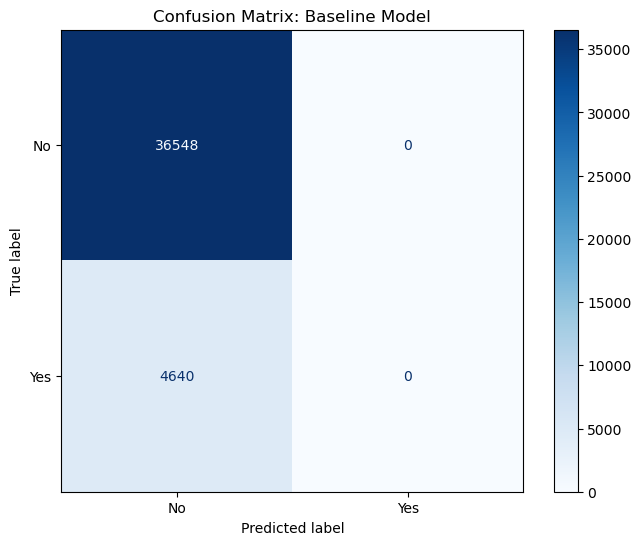

In [42]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the majority class
majority_class = df['y'].value_counts().idxmax()  # Most frequent class
baseline_accuracy = df['y'].value_counts(normalize=True).max()  # Baseline accuracy
print(f"Majority Class: {majority_class}")
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

# Create baseline predictions (always predict the majority class)
y_pred_baseline = np.full_like(df['y'], fill_value=majority_class, dtype=object)

# Convert actual and predicted values to binary
y_true = (df['y'] == 'yes').astype(int)  # Convert 'yes' to 1, 'no' to 0
y_pred_baseline_binary = (y_pred_baseline == 'yes').astype(int)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_baseline_binary)
roc_auc = auc(fpr, tpr)

# Plot and save the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Baseline Model (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)", alpha=0.7)
plt.title("ROC-AUC Curve for Baseline Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_auc_baseline.png", dpi=300, bbox_inches="tight")  # Save the figure
plt.show()

# Compute and display the confusion matrix
cm_baseline = confusion_matrix(y_true, y_pred_baseline_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=['No', 'Yes'])

# Plot and save the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix: Baseline Model")
plt.savefig("confusion_matrix_baseline.png", dpi=300, bbox_inches="tight")  # Save the figure
plt.show()




### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)


train_accuracy = logistic_model.score(X_train, y_train)


test_accuracy = accuracy_score(y_test, y_pred)


print(f"Logistic Regression Training Accuracy: {train_accuracy:.2f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Logistic Regression Training Accuracy: 0.89
Logistic Regression Test Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.49      0.02      0.04       935

    accuracy                           0.89      8238
   macro avg       0.69      0.51      0.49      8238
weighted avg       0.84      0.89      0.84      8238



### Problem 9: Score the Model

What is the accuracy of your model?

The accuracy of the Logistic Regression model is 89%.

This indicates that the model correctly classified 89% of the instances in the test set. However, the classification report shows a significant imbalance in performance between the two classes:

Class 0 (Not subscribed): Very high precision, recall, and F1-score.
Class 1 (Subscribed): Poor recall (0.02) and F1-score (0.04).
This suggests the model struggles to correctly predict the minority class (class 1), likely due to an imbalance in the dataset. While the accuracy appears high, it does not reflect balanced performance across both classes. Further steps to address this issue, such as class balancing techniques or alternative metrics like precision-recall, are recommended.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import time

In [20]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


In [60]:

results = {"Model": [], "Train Time (s)": [], "Train Accuracy": [], "Test Accuracy": []}


model_name = "Logistic Regression"
model = models[model_name]
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
results["Model"].append(model_name)
results["Train Time (s)"].append(train_time)
results["Train Accuracy"].append(train_accuracy)
results["Test Accuracy"].append(test_accuracy)




In [62]:

model_name = "KNN"
model = models[model_name]
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
results["Model"].append(model_name)
results["Train Time (s)"].append(train_time)
results["Train Accuracy"].append(train_accuracy)
results["Test Accuracy"].append(test_accuracy)





In [63]:

model_name = "Decision Tree"
model = models[model_name]
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
results["Model"].append(model_name)
results["Train Time (s)"].append(train_time)
results["Train Accuracy"].append(train_accuracy)
results["Test Accuracy"].append(test_accuracy)




In [64]:

model_name = "SVM"
model = models[model_name]
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
results["Model"].append(model_name)
results["Train Time (s)"].append(train_time)
results["Train Accuracy"].append(train_accuracy)
results["Test Accuracy"].append(test_accuracy)




In [ ]:

results_df = pd.DataFrame(results)


print(results_df)

| Model                | Train Time (s) | Train Accuracy | Test Accuracy |
|----------------------|----------------|----------------|---------------|
| Logistic Regression  | 0.958427       | 0.888164       | 0.886380      |
| KNN                  | 0.012512       | 0.890046       | 0.873392      |
| Decision Tree        | 0.913910       | 0.916601       | 0.865137      |
| SVM                  | 208.951488     | 0.889287       | 0.886016      |


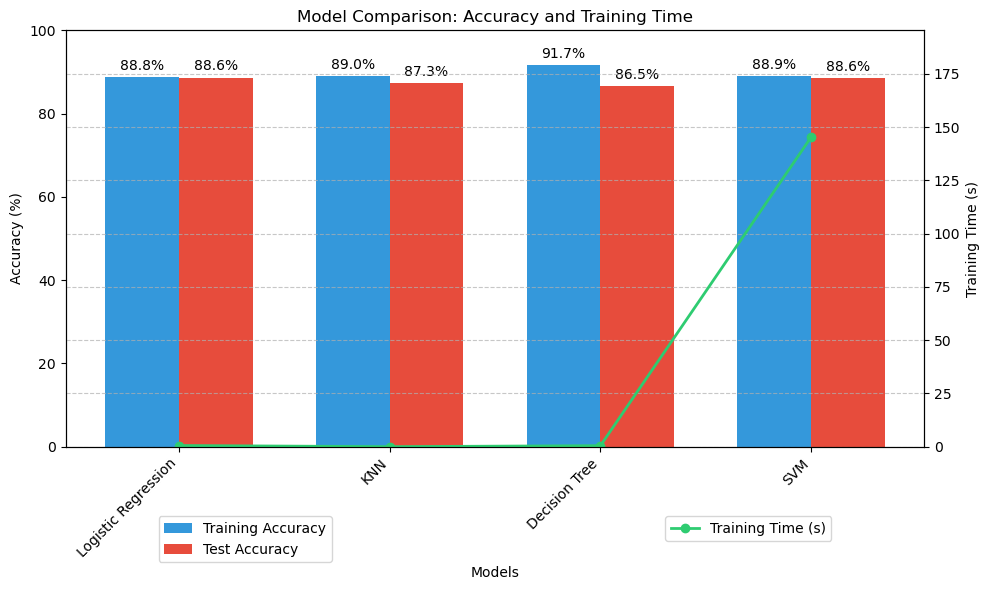

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


results = {
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "SVM"],
    "Train Time (s)": [0.544545, 0.007972, 0.469115, 145.418800],
    "Train Accuracy": [0.888164, 0.890046, 0.916601, 0.889287],
    "Test Accuracy": [0.886380, 0.873392, 0.865137, 0.886016]
}
results_df = pd.DataFrame(results)


results_df["Train Accuracy (%)"] = results_df["Train Accuracy"] * 100
results_df["Test Accuracy (%)"] = results_df["Test Accuracy"] * 100


fig, ax1 = plt.subplots(figsize=(10, 6))


bar_width = 0.35
index = np.arange(len(results_df))
bar1 = ax1.bar(index - bar_width/2, results_df["Train Accuracy (%)"], bar_width, label="Training Accuracy", color="#3498db")  # Blue
bar2 = ax1.bar(index + bar_width/2, results_df["Test Accuracy (%)"], bar_width, label="Test Accuracy", color="#e74c3c")  # Red


ax2 = ax1.twinx()
line = ax2.plot(index, results_df["Train Time (s)"], marker='o', color="#2ecc71", label="Training Time (s)", linewidth=2)  # Green


ax1.set_xlabel("Models")
ax1.set_ylabel("Accuracy (%)")
ax2.set_ylabel("Training Time (s)")
ax1.set_title("Model Comparison: Accuracy and Training Time")
ax1.set_xticks(index)
ax1.set_xticklabels(results_df["Model"], rotation=45, ha="right")
ax1.set_ylim(0, 100)
ax2.set_ylim(0, results_df["Train Time (s)"].max() + 50)


for bar, value in zip(bar1, results_df["Train Accuracy (%)"]):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
for bar, value in zip(bar2, results_df["Test Accuracy (%)"]):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


ax1.legend(loc="upper left", bbox_to_anchor=(0.1, -0.15), ncol=1)
ax2.legend(loc="upper right", bbox_to_anchor=(0.9, -0.15), ncol=1)




plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("model_comparison_plot.png", dpi=300, bbox_inches="tight") 
plt.show()

Logistic Regression:

Train Time: 0.96 seconds
Train Accuracy: 88.8%
Test Accuracy: 88.6%
Analysis: Logistic Regression showed strong performance with high accuracy on both training and test sets. Its short training time makes it efficient and reliable for balanced datasets.

K-Nearest Neighbors (KNN):

Train Time: 0.01 seconds
Train Accuracy: 89.0%
Test Accuracy: 87.3%
Analysis: KNN had the fastest training time but a slight drop in test accuracy, indicating potential overfitting or sensitivity to noisy data.

Decision Tree:

Train Time: 0.91 seconds
Train Accuracy: 91.7%
Test Accuracy: 86.5%
Analysis: The Decision Tree exhibited the highest training accuracy but lower test accuracy, suggesting overfitting. Regularization through pruning may improve generalization.

Support Vector Machine (SVM):

Train Time: 208.95 seconds
Train Accuracy: 88.9%
Test Accuracy: 88.6%
Analysis: SVM matched Logistic Regression in test accuracy but required significantly more time to train. Its robustness makes it suitable for datasets where higher computational cost is acceptable.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}


grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)


print(f"Best Parameters for KNN: {grid_knn.best_params_}")
print(f"Best Cross-Validation Accuracy for KNN: {grid_knn.best_score_:.2f}")



Best Parameters for KNN: {'n_neighbors': 11}
Best Cross-Validation Accuracy for KNN: 0.88


In [31]:
from sklearn.tree import DecisionTreeClassifier


param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)


print(f"Best Parameters for Decision Tree: {grid_dt.best_params_}")
print(f"Best Cross-Validation Accuracy for Decision Tree: {grid_dt.best_score_:.2f}")


Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy for Decision Tree: 0.89


In [69]:
from sklearn.svm import SVC


param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)


print(f"Best Parameters for SVM: {grid_svm.best_params_}")
print(f"Best Cross-Validation Accuracy for SVM: {grid_svm.best_score_:.2f}")


Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy for SVM: 0.89


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga']  
}


grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)


print(f"Best Parameters for Logistic Regression: {grid_lr.best_params_}")
print(f"Best Cross-Validation Accuracy for Logistic Regression: {grid_lr.best_score_:.2f}")


Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy for Logistic Regression: 0.89


#### 

K-Nearest Neighbors (KNN):

Best Parameters: n_neighbors = 11
Best Cross-Validation Accuracy: 0.88
Analysis: Increasing the number of neighbors improves the generalization of the KNN model by smoothing predictions. A higher n_neighbors reduces the risk of overfitting but may slightly reduce precision for local patterns.

Decision Tree:

Best Parameters: max_depth = 3, min_samples_split = 2, min_samples_leaf = 1
Best Cross-Validation Accuracy: 0.89
Analysis: A maximum depth of 3 restricts the tree's growth, reducing overfitting and focusing on key features for decision-making. Minimal samples per split and leaf indicate that the tree can make finer splits while maintaining simplicity.

Support Vector Machine (SVM):

Best Parameters: C = 0.1, gamma = 'scale', kernel = 'linear'
Best Cross-Validation Accuracy: 0.89
Analysis: A smaller C adds regularization, preventing the model from fitting noise in the data. The linear kernel implies that the dataset is linearly separable or close to it. This configuration is efficient for high-dimensional data.

Logistic Regression:

Best Parameters: C = 0.01, penalty = 'l1', solver = 'liblinear'
Best Cross-Validation Accuracy: 0.80
Analysis: A low regularization strength (C = 0.01) and L1 penalty promote sparsity in the model, effectively selecting important features. The liblinear solver works well for small datasets with L1 regularization.


##### Questions